history match the freyberg model using a single ``K`` parameter and a single recharge parameter

In [1]:
%matplotlib inline
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import pyemu
import platform
import pestools as pt
if 'window' in platform.platform().lower():
    ppp = 'pest++'
else:
    ppp = './pestpp'

setting random seed

GIS dependencies not installed. Please see readme for instructions on installation


In [2]:
base_dir = os.path.join("..","..","models","Freyberg","Freyberg_K_and_R")
assert os.path.exists(base_dir)
[shutil.copy2(os.path.join(base_dir,f),f) for f in os.listdir(base_dir)]

['.DS_Store',
 'botm.ref',
 'freyberg.bas',
 'freyberg.bpa',
 'freyberg.dis',
 'freyberg.hds',
 'freyberg.heads',
 'freyberg.heads.ins',
 'freyberg.heads_potobs.ins',
 'freyberg.hyd',
 'freyberg.hyd.bin',
 'freyberg.jcb',
 'freyberg.locations',
 'freyberg.lpf',
 'freyberg.lpf.tpl',
 'freyberg.mpbas',
 'freyberg.mplist',
 'freyberg.mpnam',
 'freyberg.mpsim',
 'freyberg.nam',
 'freyberg.oc',
 'freyberg.pcg',
 'freyberg.post.cov',
 'freyberg.pst',
 'freyberg.rch',
 'freyberg.rch.tpl',
 'freyberg.riv',
 'freyberg.rivflux',
 'freyberg.rivflux.ins',
 'freyberg.travel',
 'freyberg.travel.ins',
 'freyberg.wel',
 'freyberg_w_flux.post.cov',
 'freyberg_w_flux.pst',
 'gsa',
 'gsa.exe',
 'hk.ref',
 'hk.ref.tpl',
 'ibound.ref',
 'inschek',
 'inschek.exe',
 'mf2005',
 'mf2005.exe',
 'MF_NWT.exe',
 'mfnwt',
 'mp6',
 'mp6.exe',
 'mp6x64.exe',
 'mpath.in',
 'pest++.exe',
 'pestchek',
 'pestchek.exe',
 'pestpp',
 'pestpp-opt',
 'Process_output.py',
 'run_model.py',
 'strt.ref',
 'sweep',
 'sweep.exe',
 

In [3]:
os.system("{0} freyberg.pst".format(ppp))

0

``PEST++`` only ran the model one time - why?

In [4]:
pst = pyemu.Pst("freyberg.pst")
pst.observation_data

Pst.load() warning: duplicate pest++ option found:forecasts


,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,1.0,head_cal
cr03c10,cr03c10,24.08591,1.0,head_cal
cr04c9,cr04c9,22.33339,1.0,head_cal
cr10c2,cr10c2,31.83430,1.0,head_cal
cr14c11,cr14c11,17.72841,1.0,head_cal
cr16c17,cr16c17,16.56648,1.0,head_cal
cr22c11,cr22c11,18.28594,1.0,head_cal
cr23c16,cr23c16,15.20820,1.0,head_cal
cr25c5,cr25c5,24.24294,1.0,head_cal


Let's give the observation ``rivflux_cal`` a non-zero weight

In [5]:
pst.observation_data.loc["rivflux_cal","weight"] = 0.01 #super subjective
pst.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
cr03c16,cr03c16,22.18672,1.00,head_cal
cr03c10,cr03c10,24.08591,1.00,head_cal
cr04c9,cr04c9,22.33339,1.00,head_cal
cr10c2,cr10c2,31.83430,1.00,head_cal
cr14c11,cr14c11,17.72841,1.00,head_cal
cr16c17,cr16c17,16.56648,1.00,head_cal
cr22c11,cr22c11,18.28594,1.00,head_cal
cr23c16,cr23c16,15.20820,1.00,head_cal
cr25c5,cr25c5,24.24294,1.00,head_cal


In [6]:
pst.control_data.noptmax = 20
pst.write("freyberg.pst")

In [7]:
os.system("{0} freyberg.pst".format(ppp))

0

Let's explore the results

In [8]:
df_obj = pd.read_csv("freyberg.iobj",index_col=0)
df_obj

,model_runs_completed,total_phi,measurement_phi,regularization_phi,head_fore,flux_fore,flux_cal,travel_fore,head_cal
iteration,,,,,,,,,
0,0,179.2480,179.2480,0,0,0,81.067700,0,98.1803
1,13,23.8955,23.8955,0,0,0,3.162810,0,20.7326
2,25,18.9436,18.9436,0,0,0,0.013181,0,18.9304
3,37,18.9403,18.9403,0,0,0,0.006732,0,18.9336
4,51,18.9404,18.9404,0,0,0,0.006709,0,18.9337


In [9]:
res = pt.Res('freyberg.rei')

In [10]:
res.describe_groups('head_cal')

,Group summary
n,13
Range,4.44588
Max,2.30543
Min,-2.14045
Mean,0.127373
Standard deviation,1.24909
Varience,1.56022
25%,-0.88996
50%,0.30668
75%,0.97081


In [11]:
res.describe_groups('flux_cal')

,Group summary
n,1.000000
Range,0.000000
Max,8.205000
Min,8.205000
Mean,8.205000
Standard deviation,NaN
Varience,NaN
25%,8.205000
50%,8.205000
75%,8.205000


(<matplotlib.figure.Figure at 0x11606c978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11605df60>)

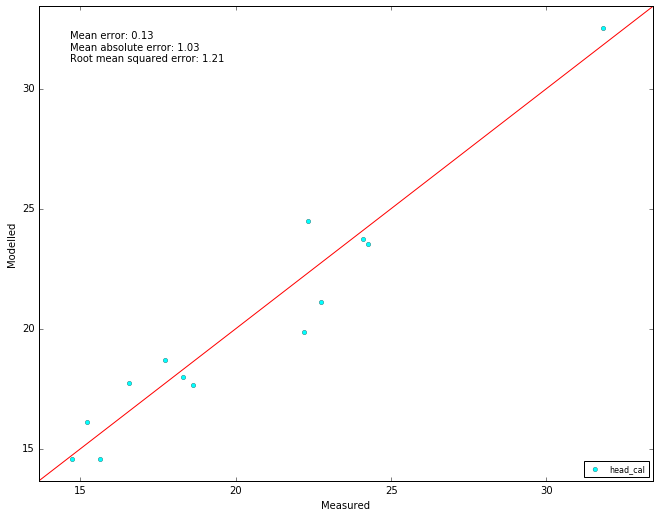

In [12]:
res.plot_one2one('head_cal',print_stats=['Mean', 'MAE', 'RMSE'])

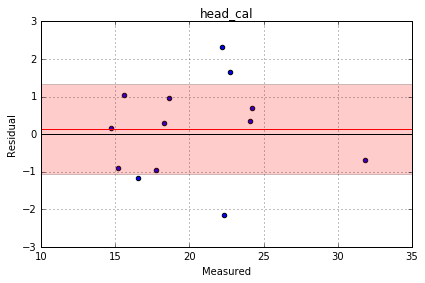

In [13]:
res.plot_measured_vs_residual('head_cal')

In [14]:
df_paru = pd.read_csv("freyberg.par.usum.csv",index_col=0)
df_paru

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
RCH1,-3.95861,0.073176,-4.10496,-3.81226,-3.869000,0.001033,-3.871070,-3.866940
HK1,0.90309,0.451545,0.00000,1.80618,0.683571,0.033394,0.616783,0.750359


In [15]:
df_foreu = pd.read_csv("freyberg.pred.usum.csv",index_col=0)
df_foreu.loc[:,"reduction"] = 100.0 *  (1.0 - (df_foreu.post_stdev / df_foreu.prior_stdev))

df_foreu

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound,reduction
name,,,,,,,,,
FR03C16,19.5468,0.587618,18.3715,20.7220,19.8259,0.043895,19.7381,19.9137,92.530028
FR04C9,21.7047,5.065180,11.5743,31.8351,24.2517,0.378573,23.4945,25.0088,92.525971
RIVFLUX_FORE,-2173.7300,588.004000,-3349.7400,-997.7230,-2784.2700,15.472400,-2815.2100,-2753.3200,97.368657
TRAVEL_TIME,16856.9000,21333.200000,-25809.5000,59523.4000,25133.9000,1577.690000,21978.5000,28289.3000,92.604532


compare these results with the ``k_and_r`` model without flux obs

In [16]:
df_paru_base = pd.read_csv(os.path.join("..","freyberg_k_and_r","freyberg.par.usum.csv"),index_col=0)
df_paru_base

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
RCH1,-3.95861,0.073176,-4.10496,-3.81226,-3.809670,0.070470,-3.950610,-3.668730
HK1,0.90309,0.451545,0.00000,1.80618,0.758232,0.084304,0.589625,0.926838


In [17]:
df_paru_concat = pd.concat([df_paru,df_paru_base],join="outer",axis=1,keys=["heads+fluxobs","heads_only"])
df_paru_concat

heads+fluxobs                                                            \
        prior_mean prior_stdev prior_lower_bound prior_upper_bound post_mean   
name                                                                           
RCH1      -3.95861    0.073176          -4.10496          -3.81226 -3.869000   
HK1        0.90309    0.451545           0.00000           1.80618  0.683571   

                                                  heads_only              \
     post_stdev post_lower_bound post_upper_bound prior_mean prior_stdev   
name                                                                       
RCH1   0.001033        -3.871070        -3.866940   -3.95861    0.073176   
HK1    0.033394         0.616783         0.750359    0.90309    0.451545   

                                                               \
     prior_lower_bound prior_upper_bound post_mean post_stdev   
name                                                            
RCH1          -4.10496          -3.81226 -3.809670   0.070470   
HK1            0.00000           1.80618  0.758232   0.084304   

                                        
     post_lower_bound post_upper_bound  
name                                    
RCH1        -3.950610        -3.668730  
HK1          0.589625         0.926838

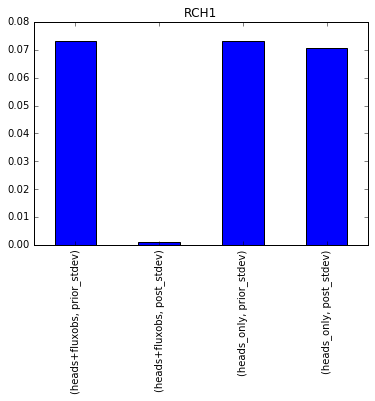

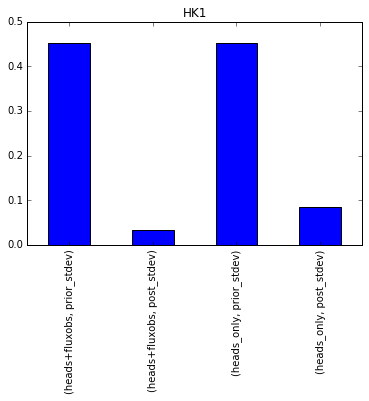

In [18]:
for pname in df_paru_concat.index:
    ax = df_paru_concat.loc[pname,(slice(None),("prior_stdev","post_stdev"))].plot(kind="bar")
    ax.set_title(pname)
    plt.show()

The information in the flux obs has reduced parameter uncertainty

In [19]:
df_foreu_single = pd.read_csv(os.path.join("..","freyberg_k_and_r","freyberg.pred.usum.csv"),index_col=0)
df_foreu_single.loc[:,"reduction"] = 100.0 *  (1.0 - (df_foreu_single.post_stdev / df_foreu_single.prior_stdev))
df_foreu_single

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound,reduction
name,,,,,,,,,
FR03C16,19.5468,0.592905,18.3610,20.7326,19.8101,0.045030,19.7200,19.9001,92.405259
FR04C9,21.7047,4.925390,11.8539,31.5555,24.0348,0.391932,23.2509,24.8187,92.042620
RIVFLUX_FORE,-2173.7300,664.480000,-3502.6900,-844.7700,-3247.4900,571.563000,-4390.6100,-2104.3600,13.983416
TRAVEL_TIME,16856.9000,18013.800000,-19170.7000,52884.6000,21883.8000,3363.070000,15157.6000,28609.9000,81.330591


In [20]:
df_foreu_concat = pd.concat([df_foreu,df_foreu_single],join="outer",axis=1,keys=["heads+fluxobs","heads_only"])
df_foreu_concat

heads+fluxobs                                                    \
                prior_mean   prior_stdev prior_lower_bound prior_upper_bound   
name                                                                           
FR03C16            19.5468      0.587618           18.3715           20.7220   
FR04C9             21.7047      5.065180           11.5743           31.8351   
RIVFLUX_FORE    -2173.7300    588.004000        -3349.7400         -997.7230   
TRAVEL_TIME     16856.9000  21333.200000       -25809.5000        59523.4000   

                                                                         \
               post_mean   post_stdev post_lower_bound post_upper_bound   
name                                                                      
FR03C16          19.8259     0.043895          19.7381          19.9137   
FR04C9           24.2517     0.378573          23.4945          25.0088   
RIVFLUX_FORE  -2784.2700    15.472400       -2815.2100       -2753.3200   
TRAVEL_TIME   25133.9000  1577.690000       21978.5000       28289.3000   

                         heads_only                                  \
              reduction  prior_mean   prior_stdev prior_lower_bound   
name                                                                  
FR03C16       92.530028     19.5468      0.592905           18.3610   
FR04C9        92.525971     21.7047      4.925390           11.8539   
RIVFLUX_FORE  97.368657  -2173.7300    664.480000        -3502.6900   
TRAVEL_TIME   92.604532  16856.9000  18013.800000       -19170.7000   

                                                                          \
             prior_upper_bound   post_mean   post_stdev post_lower_bound   
name                                                                       
FR03C16                20.7326     19.8101     0.045030          19.7200   
FR04C9                 31.5555     24.0348     0.391932          23.2509   
RIVFLUX_FORE         -844.7700  -3247.4900   571.563000       -4390.6100   
TRAVEL_TIME         52884.6000  21883.8000  3363.070000       15157.6000   

                                          
             post_upper_bound  reduction  
name                                      
FR03C16               19.9001  92.405259  
FR04C9                24.8187  92.042620  
RIVFLUX_FORE       -2104.3600  13.983416  
TRAVEL_TIME        28609.9000  81.330591

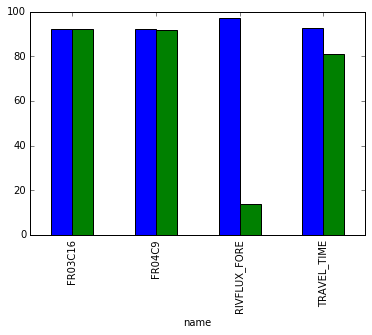

In [22]:
df_foreu_concat.loc[:,(slice(None),"reduction")].plot(kind="bar",legend=False)

The information in the flux obs has reduced ``rivflux_fore`` forecast uncertainty dramatically, but has not really helped with ``travel_time``.  So we see that the same model/observation data set can make some forecasts well and others - meh...
